# Project #1 - Impact of COVID-19 : Comparative Portfolio Analysis

* What is the performance of S&P500 over time from 2007 to Present?
* What is the effect of COVID 19 on the sectors represented in the custom portfolio?
* How has COVID19 affected the Fintech space?
* What are the key takeaways from the analysis of portfolio stocks,  Fintech ETF and the overall market now and ten years down the road?


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

import seaborn as sns
import requests
import json

import os
import hvplot.pandas
import plotly.express as px
from dotenv import load_dotenv

import panel as pn
pn.extension("plotly")

from tabulate import tabulate

%matplotlib inline

# Data Cleaning
## Files:
1. atnt_stock.csv
2. FINX stock.csv
3. JPM.csv
4. MSFT.csv
5. PFE stock.csv
6. xom_stock.csv
7. inx.csv
8. snp500.csv

## What is the performance of S&P500 over time from 2007 to Present?

In [2]:
# Reading S&P 500 returns
snp500_hist_csv = Path("Data/snp500.csv")
snp500_data = pd.read_csv(snp500_hist_csv, parse_dates=True, infer_datetime_format=True)
snp500_data['Date'] = pd.to_datetime(snp500_data['Date']).dt.date
snp500_data = snp500_data.set_index('Date').sort_index(ascending = True)
snp500_data.hvplot(xlabel="Date", ylabel="Stock Price",title = "S&P500", figsize = [20, 10])


:Curve   [Date]   (Close)

## What is the effect of COVID 19 on the sectors represented in the custom portfolio between January 2019 to June 2020?

In [3]:
# Reading AT&T returns
atnt_hist_csv = Path("Data/atnt_stock.csv")
atnt_data = pd.read_csv(atnt_hist_csv, parse_dates=True, infer_datetime_format=True)
atnt_data['Date'] = pd.to_datetime(atnt_data['Date']).dt.date
atnt_data = atnt_data.set_index('Date').sort_index(ascending = True)
atnt_data.head()

Symbol  Close
Date                    
2019-01-02      T  29.54
2019-01-03      T  29.58
2019-01-04      T  30.34
2019-01-07      T  30.89
2019-01-08      T  31.28

In [4]:
# Reading JPM returns
jpm_hist_csv = Path("Data/JPM.csv")
jpm_data = pd.read_csv(jpm_hist_csv, parse_dates=True, infer_datetime_format=True)
jpm_data['Date'] = pd.to_datetime(jpm_data['Date']).dt.date
jpm_data = jpm_data.set_index('Date').sort_index(ascending = True)
jpm_data.head()

Symbol   Close
Date                     
2019-01-02    JPM   99.31
2019-01-03    JPM   97.11
2019-01-04    JPM  100.69
2019-01-07    JPM  100.76
2019-01-08    JPM  100.57

In [5]:
# Reading MSFT returns
msft_hist_csv = Path("Data/MSFT.csv")
msft_data = pd.read_csv(msft_hist_csv, parse_dates=True, infer_datetime_format=True)
msft_data['Date'] = pd.to_datetime(msft_data['Date']).dt.date
msft_data = msft_data.set_index('Date').sort_index(ascending = True)
msft_data.head()

Symbol   Close
Date                     
2019-01-02   MSFT  101.12
2019-01-03   MSFT   97.40
2019-01-04   MSFT  101.93
2019-01-07   MSFT  102.06
2019-01-08   MSFT  102.80

In [6]:
# Reading XOM returns
xom_hist_csv = Path("Data/xom_stock.csv")
xom_data = pd.read_csv(xom_hist_csv, parse_dates=True, infer_datetime_format=True)
xom_data['Date'] = pd.to_datetime(xom_data['Date']).dt.date
xom_data = xom_data.set_index('Date').sort_index(ascending = True)
xom_data.head()

Symbol  Close
Date                    
2019-01-02    XOM  69.69
2019-01-03    XOM  68.62
2019-01-04    XOM  71.15
2019-01-07    XOM  71.52
2019-01-08    XOM  72.04

In [7]:
# Reading PFE returns
pfe_hist_csv = Path("Data/PFE_stock.csv")
pfe_data = pd.read_csv(pfe_hist_csv, parse_dates=True, infer_datetime_format=True)
pfe_data['Date'] = pd.to_datetime(pfe_data['Date']).dt.date
pfe_data = pfe_data.set_index('Date').sort_index(ascending = True)
pfe_data.head()

Symbol  Close
Date                    
2019-01-02    PFE  43.25
2019-01-03    PFE  42.04
2019-01-04    PFE  43.00
2019-01-07    PFE  43.23
2019-01-08    PFE  43.43

In [8]:
# Custom Portfolio
custom_portfolio = pd.concat([atnt_data,jpm_data,msft_data,xom_data,pfe_data], axis="rows", join="inner")
custom_portfolio = custom_portfolio.reset_index()
custom_portfolio.head()

Date Symbol  Close
0  2019-01-02      T  29.54
1  2019-01-03      T  29.58
2  2019-01-04      T  30.34
3  2019-01-07      T  30.89
4  2019-01-08      T  31.28

In [9]:
#Custom Portfolio
custom_portfolio = custom_portfolio.pivot_table(values="Close", index="Date", columns="Symbol")
custom_portfolio.head()

Symbol         JPM    MSFT    PFE      T    XOM
Date                                           
2019-01-02   99.31  101.12  43.25  29.54  69.69
2019-01-03   97.11   97.40  42.04  29.58  68.62
2019-01-04  100.69  101.93  43.00  30.34  71.15
2019-01-07  100.76  102.06  43.23  30.89  71.52
2019-01-08  100.57  102.80  43.43  31.28  72.04

In [10]:
#Custom Portfolio performance of individual stocks
import holoviews as hv
custom_portfolio.hvplot(xlabel="Date", ylabel="Stock Price",title = "5 stocks in custom portfolio", figsize = [20, 10])


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [11]:
# Drop Nulls
custom_portfolio = custom_portfolio.dropna().copy()
custom_portfolio.isna().sum()

Symbol
JPM     0
MSFT    0
PFE     0
T       0
XOM     0
dtype: int64

In [12]:
# Calculate weighted portfolio returns
weights = [2/10, 4/10, 1/10, 1/10, 2/10]
# YOUR CODE HERE
custom_portfolio_returns = custom_portfolio.pct_change()
custom_weighted_port_returns = custom_portfolio_returns.dot(weights)
custom_weighted_port_returns.head()

Date
2019-01-02         NaN
2019-01-03   -0.024879
2019-01-04    0.038204
2019-01-07    0.004037
2019-01-08    0.005702
dtype: float64

## How has COVID19 affected the Fintech space?

In [13]:
# Reading FINX ETF data
finx_hist_csv = Path("Data/FINX_stock.csv")
finx_data = pd.read_csv(finx_hist_csv, parse_dates=True, infer_datetime_format=True)
finx_data['Date'] = pd.to_datetime(finx_data['Date']).dt.date
finx_data = finx_data.set_index('Date').sort_index(ascending = True)
finx_data = finx_data.pivot_table(values="Close", index="Date", columns="Symbol")
finx_data.head()

Symbol       FINX
Date             
2019-01-02  22.14
2019-01-03  21.30
2019-01-04  22.32
2019-01-07  22.65
2019-01-08  23.06

In [14]:
finx_data.hvplot(xlabel="Date", ylabel="Stock Price",title = "FINX Stock", figsize = [20, 10])


:Curve   [Date]   (FINX)

In [15]:
# FINX ETF daily returns
finx_data_returns = finx_data.pct_change()
finx_data_returns.head()

Symbol          FINX
Date                
2019-01-02       NaN
2019-01-03 -0.037940
2019-01-04  0.047887
2019-01-07  0.014785
2019-01-08  0.018102

In [16]:
# Drop nulls
finx_data = finx_data.dropna().copy()
finx_data.isna().sum()

Symbol
FINX    0
dtype: int64

## How has COVID19 affected the S&P 500?

In [17]:
# Reading S&P 500 data
SP500_hist_csv = Path("Data/inx.csv")
SP500_data = pd.read_csv(SP500_hist_csv, parse_dates=True, infer_datetime_format=True)
SP500_data['Date'] = pd.to_datetime(SP500_data['Date']).dt.date
SP500_data = SP500_data.set_index('Date').sort_index(ascending = True)
SP500_data = SP500_data.pivot_table(values="Close", index="Date", columns="Symbol")
SP500_data.head()

Symbol      S&P 500
Date               
2019-01-02  2510.03
2019-01-03  2447.89
2019-01-04  2531.94
2019-01-07  2549.69
2019-01-08  2574.41

In [18]:
SP500_data.hvplot(xlabel="Date", ylabel="Stock Price",title = "S&P 500", figsize = [20, 10])


:Curve   [Date]   (S&P 500)

In [19]:
SP500_data_returns = SP500_data.pct_change()
SP500_data_returns.head()

Symbol       S&P 500
Date                
2019-01-02       NaN
2019-01-03 -0.024757
2019-01-04  0.034336
2019-01-07  0.007010
2019-01-08  0.009695

In [20]:
# Drop nulls
SP500_data = SP500_data.dropna().copy()
SP500_data.isna().sum()

Symbol
S&P 500    0
dtype: int64

## Combine Custom Portfolio, FINX ETF, and S&P 500 Returns

In [21]:
# Concatenate all DataFrames into a single DataFrame

combined_daily_returns = pd.concat([finx_data_returns,SP500_data_returns], axis="columns", join="inner")
combined_daily_returns["Custom Portfolio"]= custom_weighted_port_returns
combined_daily_returns.head()

Symbol          FINX   S&P 500  Custom Portfolio
Date                                            
2019-01-02       NaN       NaN               NaN
2019-01-03 -0.037940 -0.024757         -0.024879
2019-01-04  0.047887  0.034336          0.038204
2019-01-07  0.014785  0.007010          0.004037
2019-01-08  0.018102  0.009695          0.005702

---

## What are the key takeaways from the analysis of portfolio stocks,  Fintech ETF and the overall market?

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

In [22]:
# Plot daily returns
plt.style.use('seaborn-white')
combined_daily_returns.hvplot(xlabel="Date", ylabel="Daily returns",title = "Daily Returns", figsize = [20, 10])
 

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [23]:
# Plot cumulative returns
combined_cumulative_returns = (1+combined_daily_returns).cumprod()
plt.style.use('seaborn-white')
combined_cumulative_returns.hvplot(xlabel="Date", ylabel="Cumulative returns",title = "Cumulative Returns", figsize = [20, 10])


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## Risk Analysis

In [24]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

combined_std = combined_daily_returns.std()
combined_std_tabulate = [['FINX', 0.021597], ['S&P 500', 0.017911], ['Custom Portfolio', 0.021822]]
print(tabulate(combined_std_tabulate))

----------------  --------
FINX              0.021597
S&P 500           0.017911
Custom Portfolio  0.021822
----------------  --------


In [25]:
# Determine which portfolios are riskier than the S&P 500

riskierthan_sp500 = combined_std.gt(combined_std['S&P 500'])
riskierthan_sp500_tabulate = [['FINX', 'True'], ['S&P 500', 'False'], ['Custom Portfolio', 'True']]
print(tabulate(riskierthan_sp500_tabulate))

----------------  -----
FINX              True
S&P 500           False
Custom Portfolio  True
----------------  -----


In [26]:
# Calculate the annualized standard deviation (252 trading days)

combined_annualized_std = combined_std * np.sqrt(252)
combined_annualized_std_tabulate = [['FINX', 0.342841], ['S&P 500', 0.284328], ['Custom Portfolio', 0.346410]]
print(tabulate(combined_annualized_std_tabulate))

----------------  --------
FINX              0.342841
S&P 500           0.284328
Custom Portfolio  0.34641
----------------  --------


---

## Rolling Statistics

Risk changes over time. Analyzing the rolling statistics for Risk and Beta. 


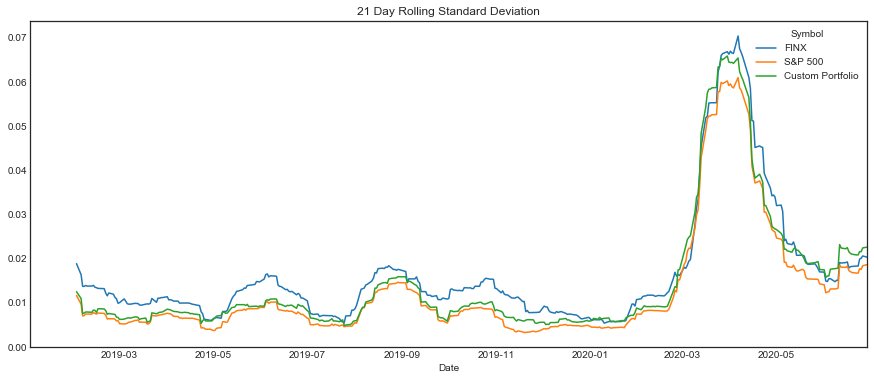

In [27]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

combined_std_21 = combined_daily_returns.rolling(window=21).std()
plt.style.use('seaborn-white')
combined_std_21.plot(title = "21 Day Rolling Standard Deviation", figsize = [15, 6])


In [28]:
# Construct a correlation table
correlation = combined_daily_returns.corr()
correlation.style.background_gradient(cmap='summer')
correlation_tabulate =[['Symbol', 'FINX', 'S&P 500', 'Custom Portfolio'], ['FINX', 1, 0.918041, 0.884713], ['S&P 500', 0.918041, 1, 0.97584], ['Custom Portfolio', 0.884713, 0.97584, 1]]
print(tabulate(correlation_tabulate, headers = 'firstrow'))

Symbol                FINX    S&P 500    Custom Portfolio
----------------  --------  ---------  ------------------
FINX              1          0.918041            0.884713
S&P 500           0.918041   1                   0.97584
Custom Portfolio  0.884713   0.97584             1


Custom Cov: 0.00034574914165229906 | S&P 500 Var: 0.00032080225864068235 | Custom Beta: 1.07776405040701


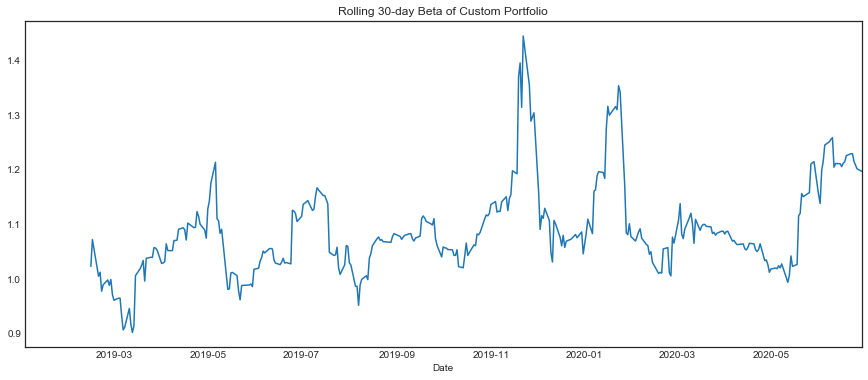

In [29]:
# Beta comparison for Custom portfolio compared to the total market (S&P 500)
custom_cov = combined_daily_returns['Custom Portfolio'].cov(combined_daily_returns['S&P 500'])
variance = combined_daily_returns['S&P 500'].var()
custom_beta = custom_cov / variance
print(f"Custom Cov: {custom_cov} | S&P 500 Var: {variance} | Custom Beta: {custom_beta}")

rolling_custom_cov = combined_daily_returns['Custom Portfolio'].rolling(window=30).cov(combined_daily_returns['S&P 500'])
rolling_variance = combined_daily_returns['S&P 500'].rolling(window=30).var()
rolling_custom_beta = rolling_custom_cov / rolling_variance
plt.style.use('seaborn-white')
rolling_custom_beta.plot(title = "Rolling 30-day Beta of Custom Portfolio", figsize = [15, 6])

FINX Cov: 0.00035511895148906736 | S&P 500 Var: 0.00032080225864068235 | FINX Beta: 1.07776405040701


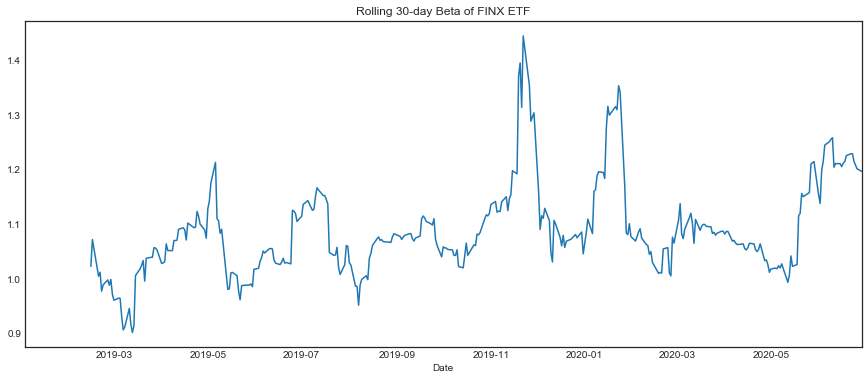

In [30]:
# Beta comparison for FINX ETF compared to the total market (S&P 500)
finx_cov = combined_daily_returns['FINX'].cov(combined_daily_returns['S&P 500'])
variance = combined_daily_returns['S&P 500'].var()
finx_beta = custom_cov / variance
print(f"FINX Cov: {finx_cov} | S&P 500 Var: {variance} | FINX Beta: {finx_beta}")

rolling_finx_cov = combined_daily_returns['FINX'].rolling(window=30).cov(combined_daily_returns['S&P 500'])
rolling_variance = combined_daily_returns['S&P 500'].rolling(window=30).var()
rolling_finx_beta = rolling_custom_cov / rolling_variance
plt.style.use('seaborn-white')
rolling_finx_beta.plot(title = "Rolling 30-day Beta of FINX ETF", figsize = [15, 6])

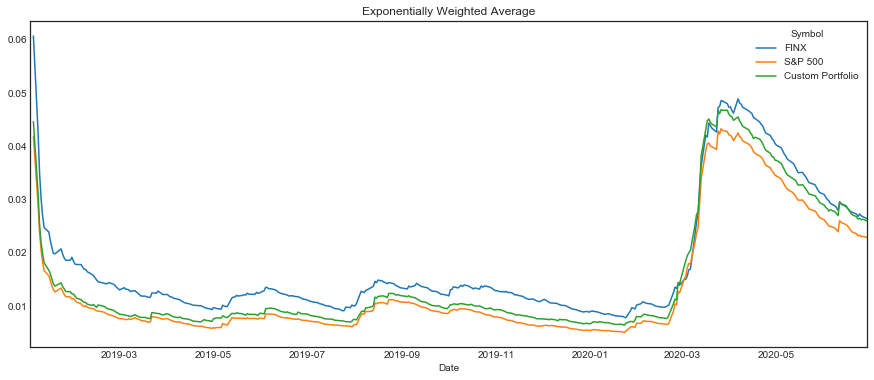

In [31]:
# Calculate a rolling window using the exponentially weighted moving average. 
ewm_combined = combined_daily_returns.ewm(halflife=21).std()
plt.style.use('seaborn-white')
ewm_combined.plot(title = "Exponentially Weighted Average", figsize = [15, 6])


---

## Sharpe Ratios
Using the daily returns, calculation and visualization of Sharpe ratios using a bar plot.


In [32]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_daily_returns.mean() * 252) / (combined_daily_returns.std() * np.sqrt(252))
sharpe_ratios_tabulate = [['FINX', 0.933097], ['S&P 500', 0.606238], ['Custom Portfolio', 0.615500]]
print(tabulate(sharpe_ratios_tabulate))

----------------  --------
FINX              0.933097
S&P 500           0.606238
Custom Portfolio  0.6155
----------------  --------


In [33]:
# Visualize the sharpe ratios as a bar plot
plt.style.use('seaborn-white')
sharpe_ratio_plot = sharpe_ratios.hvplot(kind="bar", title="Sharpe Ratios")
sharpe_ratio_plot

:Bars   [Symbol]   (0)

The higher a fund's Sharpe ratio, the better its returns have been relative to the amount of investment risk it has taken

FINX has the highest sharpe Ratios and custom portfolio has the lowest sharpe ratios

## What will the stock prices be after 10 years? What hapens to our investment strategy when we experience another global pandemic?

---

In [34]:
# Mean of daily returns for Custom Portfolio, FINX and S&P 500
avg_daily_return_finx = combined_daily_returns.mean()["FINX"]
avg_daily_return_snp500 = combined_daily_returns.mean()["S&P 500"]
avg_daily_return_custom_porfolio = combined_daily_returns.mean()["Custom Portfolio"]
avg_daily_return_custom_porfolio

0.0006413866244854975

In [35]:
# Compute daily volatility for Custom Portfolio, FINX and S&P 500
std_daily_return_finx = combined_daily_returns.std()["FINX"]
std_daily_return_snp500 = combined_daily_returns.std()["S&P 500"]
std_daily_return_custom_porfolio = combined_daily_returns.std()["Custom Portfolio"]
std_daily_return_custom_porfolio

0.019787420913447956

In [36]:
# Save the last day's closing price
finx_last_price = finx_data["FINX"][-1]
snp500_last_price = SP500_data['S&P 500'][-1]
custom_potfolio_last_price = combined_daily_returns["Custom Portfolio"][-1]


In [37]:
# Setup the Monte Carlo Parameters
number_records = 252 * 10

### 1) Simulated FINX - 10 years

In [38]:
# Initialize the simulated prices list with the last closing price of FINX
simulated_finx_prices = [finx_last_price]

# Simulate the returns for 252 days * 10
for i in range(number_records):
    # Calculate the simulated price using the last price within the list
    simulated_price = simulated_finx_prices[-1] * (1 + np.random.normal(avg_daily_return_finx, std_daily_return_finx))
#     print(simulated_finx_prices)
    # Append the simulated price to the list
    simulated_finx_prices.append(simulated_price)
    
# Create a DataFrame of the simulated prices
finx_simulated_price_df = pd.DataFrame({
    "Simulated FINX Prices": simulated_finx_prices
})

# Print head of DataFrame
finx_simulated_price_df.head()

Simulated FINX Prices
0              32.620000
1              33.884683
2              33.864408
3              33.920406
4              33.884650

In [39]:
# Visualize the Simulation
plot_title = "Simulated Price Trajectory for FINX over the Next 10 Years (252*10 Trading Days)"
finx_simulated_price_df.hvplot(figsize=(20,10),xlabel = "Trading Day", ylabel = "simulated FINX prices",legend=None, title=plot_title)


:Curve   [index]   (Simulated FINX Prices)

In [40]:
# Probability Distribution of Simulated Price Ranges
finx_simulated_price_df['Simulated FINX Prices'].value_counts(bins=10) / len(finx_simulated_price_df['Simulated FINX Prices'])


(27.311, 377.101]       0.442285
(1416.08, 1762.406]     0.139627
(377.101, 723.427]      0.133677
(1069.754, 1416.08]     0.131297
(723.427, 1069.754]     0.051170
(2801.385, 3147.711]    0.029353
(1762.406, 2108.733]    0.027767
(2108.733, 2455.059]    0.019833
(2455.059, 2801.385]    0.015073
(3147.711, 3494.038]    0.009917
Name: Simulated FINX Prices, dtype: float64

In [41]:
# Use the `quantile` function to calculate the median and 90% confidence interval for simulated ending prices
finx_confidence_interval = finx_simulated_price_df.quantile(q=[0.05, 0.5, 0.95])
finx_confidence_interval

Simulated FINX Prices
0.05              36.293310
0.50             559.962965
0.95            2556.566866

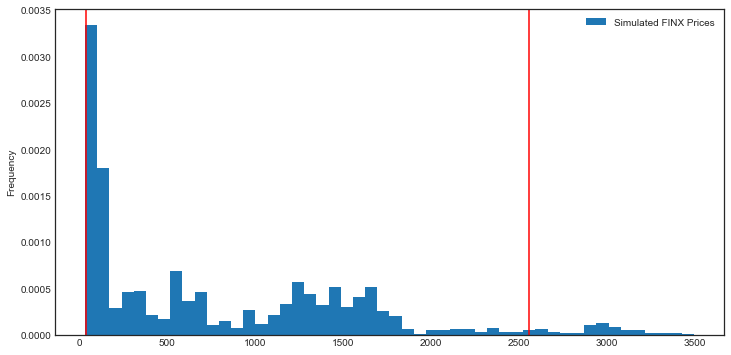

In [42]:
# Visualize the distribution of simulated prices with 90% confidence interval
# plt.figure();
finx_simulated_price_df.plot(kind="hist", bins=50, legend=True, density=True, figsize = [12, 6])
plt.axvline(int(finx_confidence_interval.iloc[0]), color="r")
plt.axvline(int(finx_confidence_interval.iloc[2]), color="r")

### 2) Simulated S&P500 - 10 years

In [43]:
# Initialize the simulated prices list with the last closing price of S&P 500
simulated_snp500_prices = [snp500_last_price]

# Simulate the returns for 252 days * 10
for i in range(number_records):
    # Calculate the simulated price using the last price within the list
    simulated_price = simulated_snp500_prices[-1] * (1 + np.random.normal(avg_daily_return_snp500, std_daily_return_snp500))
#     print(simulated_snp500_prices)
    # Append the simulated price to the list
    simulated_snp500_prices.append(simulated_price)
    
# Create a DataFrame of the simulated prices
sp500_simulated_price_df = pd.DataFrame({
    "Simulated S&P 500 Prices": simulated_snp500_prices
})

# Print head of DataFrame
sp500_simulated_price_df.head()

Simulated S&P 500 Prices
0               3053.240000
1               3021.002508
2               3006.587017
3               2965.335969
4               3086.172088

In [44]:
# Visualize the Simulation
plot_title = plot_title = "Simulated Price Trajectory for S&P 500 over the Next 10 Years(252*10 Trading Days)"
sp500_simulated_price_df.hvplot(figsize=(20,10),xlabel = "Trading Day", ylabel = "simulated S&P500 prices",legend=None, title=plot_title)


:Curve   [index]   (Simulated S&P 500 Prices)

In [45]:
# Probability Distribution of Simulated Price Ranges
sp500_simulated_price_df['Simulated S&P 500 Prices'].value_counts(bins=10) / len(sp500_simulated_price_df['Simulated S&P 500 Prices'])

(4258.559, 5852.855]              0.261404
(2648.3199999999997, 4258.559]    0.258628
(10635.742, 12230.037]            0.122967
(9041.446, 10635.742]             0.114240
(5852.855, 7447.15]               0.109084
(12230.037, 13824.333]            0.035303
(13824.333, 15418.628]            0.034907
(15418.628, 17012.924]            0.032527
(7447.15, 9041.446]               0.016660
(17012.924, 18607.22]             0.014280
Name: Simulated S&P 500 Prices, dtype: float64

In [46]:
# Use the `quantile` function to calculate the median and 90% confidence interval for simulated ending prices
sp500_confidence_interval = sp500_simulated_price_df.quantile(q=[0.05, 0.5, 0.95])
sp500_confidence_interval

Simulated S&P 500 Prices
0.05               2953.040838
0.50               5533.032046
0.95              15269.378241

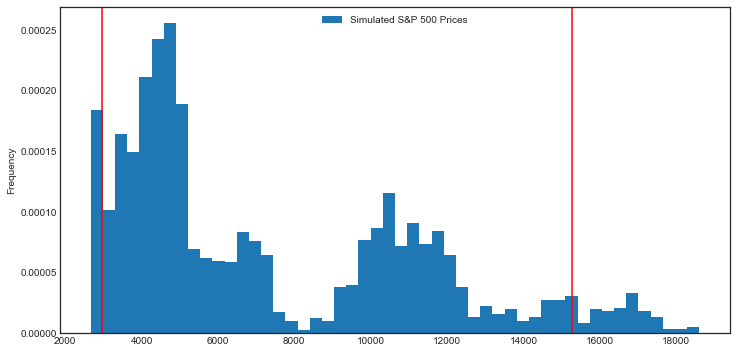

In [47]:
# Visualize the distribution of simulated prices with 90% confidence interval
# plt.figure();
sp500_simulated_price_df.plot(kind="hist", bins=50, legend=True, density=True, figsize = [12, 6])
plt.axvline(int(sp500_confidence_interval.iloc[0]), color="r")
plt.axvline(int(sp500_confidence_interval.iloc[2]), color="r")

### 3) Simulated Custom portfolio - 10 years

In [48]:
daily_returns = custom_portfolio.pct_change()
daily_returns.head()

Symbol           JPM      MSFT       PFE         T       XOM
Date                                                        
2019-01-02       NaN       NaN       NaN       NaN       NaN
2019-01-03 -0.022153 -0.036788 -0.027977  0.001354 -0.015354
2019-01-04  0.036865  0.046509  0.022835  0.025693  0.036870
2019-01-07  0.000695  0.001275  0.005349  0.018128  0.005200
2019-01-08 -0.001886  0.007251  0.004626  0.012625  0.007271

In [49]:
# Use the `mean` function to calculate the mean of daily returns
avg_daily_return_JPM = daily_returns.mean()["JPM"]
avg_daily_return_MSFT = daily_returns.mean()["MSFT"]
avg_daily_return_PFE = daily_returns.mean()["PFE"]
avg_daily_return_T = daily_returns.mean()["T"]
avg_daily_return_XOM = daily_returns.mean()["XOM"]

In [50]:
# Compute daily volatility - calculate std()
std_daily_return_JPM = daily_returns.std()["JPM"]
std_daily_return_MSFT = daily_returns.std()["MSFT"]
std_daily_return_PFE = daily_returns.std()["PFE"]
std_daily_return_T = daily_returns.std()["T"]
std_daily_return_XOM = daily_returns.std()["XOM"]

In [51]:
# Save the last day's closing price
last_price_JPM = custom_portfolio["JPM"][-1]
last_price_MSFT = custom_portfolio["MSFT"][-1]
last_price_PFE = custom_portfolio["PFE"][-1]
last_price_T = custom_portfolio["T"][-1]
last_price_XOM = custom_portfolio["XOM"][-1]

In [52]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 10

#Set portfolio weights
weights = [2/10, 4/10, 1/10, 1/10, 2/10]

# Create empty DataFrames to hold simulation results
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [53]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    
    # Initialize the simulated prices list with the last closing price of `AGG` and `SPY`
    simulated_JPM_prices = [last_price_JPM]
    simulated_MSFT_prices = [last_price_MSFT]
    simulated_PFE_prices = [last_price_PFE]
    simulated_T_prices = [last_price_T]
    simulated_XOM_prices = [last_price_XOM]
    
    # Simulate the returns for 252 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_JPM_price = simulated_JPM_prices[-1] * (1 + np.random.normal(avg_daily_return_JPM, std_daily_return_JPM))
        simulated_MSFT_price = simulated_MSFT_prices[-1] * (1 + np.random.normal(avg_daily_return_MSFT, std_daily_return_MSFT))
        simulated_PFE_price = simulated_PFE_prices[-1] * (1 + np.random.normal(avg_daily_return_PFE, std_daily_return_PFE))
        simulated_T_price = simulated_T_prices[-1] * (1 + np.random.normal(avg_daily_return_T, std_daily_return_T))
        simulated_XOM_price = simulated_XOM_prices[-1] * (1 + np.random.normal(avg_daily_return_XOM, std_daily_return_XOM))
        
        # Append the simulated price to the list
        simulated_JPM_prices.append(simulated_JPM_price)
        simulated_MSFT_prices.append(simulated_MSFT_price)
        simulated_PFE_prices.append(simulated_PFE_price)
        simulated_T_prices.append(simulated_T_price)
        simulated_XOM_prices.append(simulated_XOM_price)
    
    # Append a simulated prices of each simulation to DataFrame
    monte_carlo["JPM prices"] = pd.Series(simulated_JPM_prices)
    monte_carlo["MSFT prices"] = pd.Series(simulated_MSFT_prices)
    monte_carlo["PFE prices"] = pd.Series(simulated_PFE_prices)
    monte_carlo["T prices"] = pd.Series(simulated_T_prices)
    monte_carlo["XOM prices"] = pd.Series(simulated_XOM_prices)
 
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = monte_carlo.pct_change()
    
    # Use the `dot` function with the weights to multiply weights with each column"s simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
# Check that the simulation ran successfully
portfolio_cumulative_returns.tail()

0          1         2         3         4         5         6    \
2516  2.838133  10.744961  9.200921  1.941119  7.525250  1.697511  2.499839   
2517  2.789154  10.706172  9.066684  1.939855  7.553984  1.661135  2.486771   
2518  2.782807  10.876660  9.129048  1.951354  7.745599  1.682250  2.468651   
2519  2.714327  11.043341  9.342837  1.974196  7.795030  1.657887  2.467713   
2520  2.722958  10.935364  9.364882  1.953901  7.795038  1.681494  2.472415   

           7         8         9    ...       490       491       492  \
2516  3.800383  4.324783  2.715587  ...  1.364330  6.963823  3.297659   
2517  3.809687  4.249780  2.710830  ...  1.376521  6.932486  3.339956   
2518  3.821668  4.221453  2.713769  ...  1.371540  7.037679  3.277759   
2519  3.890981  4.216907  2.690712  ...  1.349881  7.111299  3.298712   
2520  3.963458  4.208631  2.652266  ...  1.353518  7.076661  3.343569   

           493       494       495       496       497       498       499  
2516  7.851378  4.374500  6.417475  5.149638  4.526136  1.605368  3.714100  
2517  7.865827  4.369950  6.430690  5.010147  4.533634  1.618960  3.694581  
2518  7.904026  4.324596  6.452477  5.092908  4.527572  1.606470  3.702357  
2519  7.976247  4.417408  6.459907  5.161333  4.503527  1.603673  3.735717  
2520  7.951035  4.299837  6.462451  5.172785  4.528266  1.601753  3.780380  

[5 rows x 500 columns]

<Figure size 432x288 with 0 Axes>

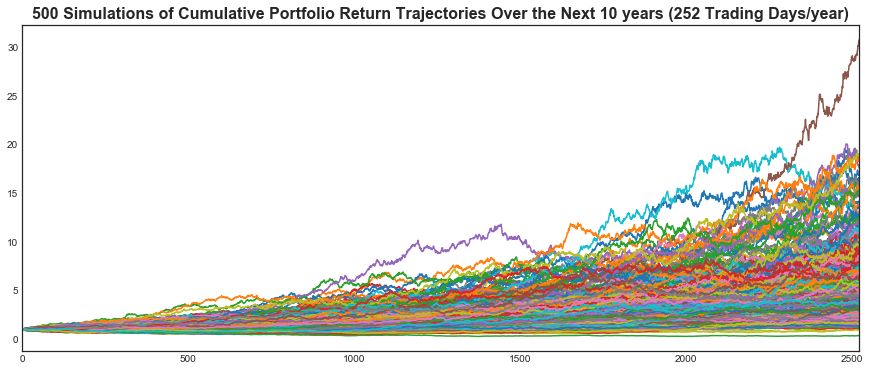

In [54]:
# Visualize the Simulation
# Use the `plot` function to plot `500` simulations of the potential trajectories of the portfolio based on 252 trading days for 10 years
plot_title = "500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 10 years (252 Trading Days/year)"
fig = plt.figure()
portfolio_cumulative_returns.plot(figsize=(15,6),legend=None)
plt.title(plot_title, fontsize=16, fontweight='bold')
plt.show()


In [55]:
# Select the last row for the cumulative returns (cumulative returns at 10 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0     2.722958
1    10.935364
2     9.364882
3     1.953901
4     7.795038
Name: 2520, dtype: float64

In [56]:
# Probability Distribution of Ending Cumulative Return Ranges
ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns)

(3.413, 6.453]      0.392
(0.342, 3.413]      0.342
(6.453, 9.493]      0.178
(9.493, 12.533]     0.044
(12.533, 15.573]    0.024
(15.573, 18.612]    0.014
(18.612, 21.652]    0.004
(27.732, 30.772]    0.002
(24.692, 27.732]    0.000
(21.652, 24.692]    0.000
Name: 2520, dtype: float64

In [57]:
# Use the `quantile` function to calculate the 90% confidence interval for simulated ending prices
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.5, 0.95])
confidence_interval

0.05     1.637536
0.50     4.249445
0.95    12.031884
Name: 2520, dtype: float64

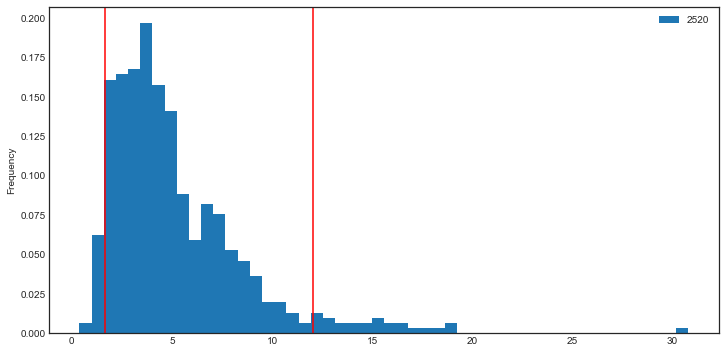

In [58]:
# Display the 90% confidence interval for the ending returns
plt.figure();
ending_cumulative_returns.plot(kind="hist", density=True, bins=50, legend= True, figsize = [12, 6])
plt.axvline(confidence_interval.iloc[0], color="r")
plt.axvline(confidence_interval.iloc[2], color="r")

## COVID-19 case analysis for US

In [59]:
# API url for COVID-19 confirmed cases in US.
url = 'https://api.covid19api.com/total/country/united-states/status/confirmed'
url = url + "?format=json"

In [60]:
# Execute GET request.
requests.get(url)

<Response [200]>

In [61]:
# Get content.
response_data = requests.get(url)
response_content = response_data.content

In [62]:
# Format data as a json file.
data = response_data.json()
print(json.dumps(data[:2], indent = 4))

[
    {
        "Country": "United States of America",
        "CountryCode": "",
        "Province": "",
        "City": "",
        "CityCode": "",
        "Lat": "0",
        "Lon": "0",
        "Cases": 1,
        "Status": "confirmed",
        "Date": "2020-01-22T00:00:00Z"
    },
    {
        "Country": "United States of America",
        "CountryCode": "",
        "Province": "",
        "City": "",
        "CityCode": "",
        "Lat": "0",
        "Lon": "0",
        "Cases": 1,
        "Status": "confirmed",
        "Date": "2020-01-23T00:00:00Z"
    }
]


In [63]:
# Extract confirmed cases and date data from json file.
case = []
date = []
for item in data:
    case.append(item['Cases'])
for item in data:
    date.append(item['Date'])

In [64]:
# Format into DataFrame
df = pd.DataFrame(case)
df_date = pd.DataFrame(date)

In [65]:
# Import S&P500 and format it into DataFrame
SP500_hist_csv = Path("Data/^GSPC.csv")
SP500_data = pd.read_csv(SP500_hist_csv, parse_dates=True, infer_datetime_format=True)
SP500_data['Date'] = pd.to_datetime(SP500_data['Date']).dt.date
SP500_data = SP500_data.set_index('Date').sort_index(ascending = True)
SP500_data = SP500_data.pivot_table(values="Close", index="Date")
SP500_data.head()

Close
Date                   
2019-01-22  2632.899902
2019-01-23  2638.699951
2019-01-24  2642.330078
2019-01-25  2664.760010
2019-01-28  2643.850098

In [66]:
# Concatenate DataFrames into a single DataFrame
joined_df = pd.concat([df, df_date], axis = 'columns', join='inner')
joined_df.columns = ['Case', 'Date']
joined_df = joined_df.set_index(pd.to_datetime(joined_df["Date"], infer_datetime_format = True))
joined_df = joined_df.drop(columns = ['Date'])
case_sp500 = pd.concat([joined_df, SP500_data], axis = 'columns', join = 'inner')
case_sp500['Daily Case'] = joined_df['Case'].diff()

# Reorder columns
case_sp500 = case_sp500[['Case', 'Daily Case', 'Close']]
case_sp500.head()

Case  Daily Case        Close
Date                                     
2020-01-22     1         NaN  3321.750000
2020-01-23     1         0.0  3325.540039
2020-01-24     2         1.0  3295.469971
2020-01-27     5         0.0  3243.629883
2020-01-28     5         0.0  3276.239990

In [67]:
new_df = case_sp500.reset_index()
fig = px.bar(new_df,x="Date", y="Case")

In [68]:
new_snp_df = SP500_data.reset_index()
sp500_plot = px.line(new_snp_df, x="Date", y="Close")

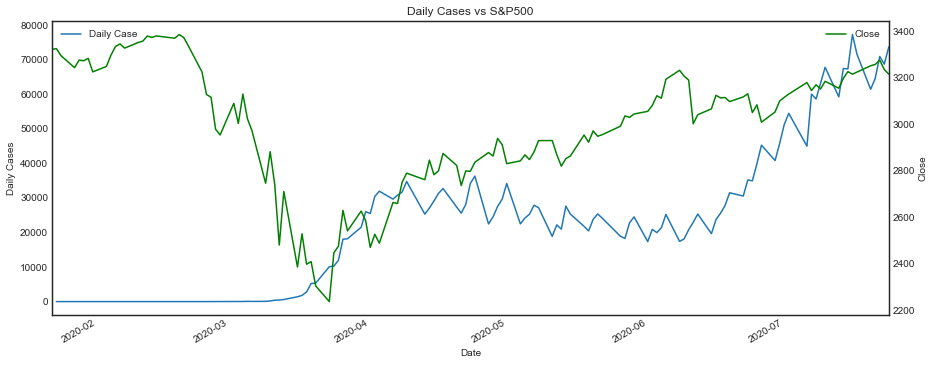

In [69]:
    new_case_df = case_sp500.reset_index()

    fig = plt.figure(figsize=(15, 6))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    # the ax keyword sets the axis that the data frame plots to
    case_sp500.plot(ax=ax1, y='Daily Case', legend=True)
    case_sp500.plot(ax=ax2, y='Close', legend= True, color='g')
    ax1.set_ylabel('Daily Cases')
    ax2.set_ylabel('Close')
    ax2.set_title('Daily Cases vs S&P500')
    plt.savefig('./image/covid_sp500.png')
    plt.show()
    

In [70]:
# Calculate percentage change for daily case and close price of S&P500
daily_pct_change = case_sp500.pct_change()
daily_pct_change = daily_pct_change.replace([np.inf, -np.inf], np.nan)
daily_pct_change.dropna(inplace = True)
daily_pct_change = daily_pct_change.drop(columns = ['Case'])

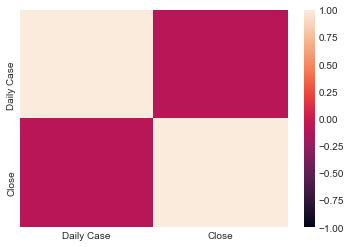

In [71]:
# Calculate and plot correlation between percentage change of daily case and close price of S&P500
correlation = daily_pct_change.corr()
sns.heatmap(correlation, vmin = -1, vmax = 1)
plt.savefig('./image/covid_corr.png')

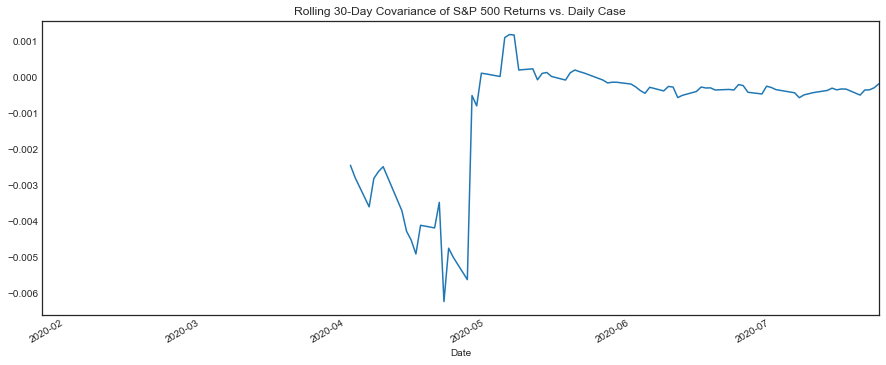

In [72]:
# Fitting rolling 30-Day Covariance of S&P 500 Returns vs. Daily Case
rolling_covariance = daily_pct_change['Close'].rolling(window=30).cov(daily_pct_change['Daily Case'])
rolling_covariance.plot(figsize=(15, 6), title='Rolling 30-Day Covariance of S&P 500 Returns vs. Daily Case')

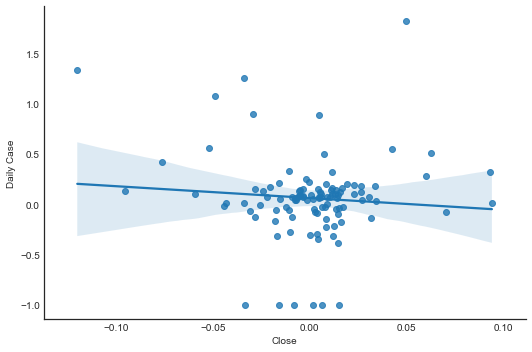

In [73]:
# Fitting regression line
sns.lmplot(x="Close", y="Daily Case", data=daily_pct_change, aspect=1.5, fit_reg=True)

# Dashboard - Impact of COVID-19 : Comparative Portfolio Analysis

In [74]:
# Create Functions for Dashboard
def snp_hist_plot():
    return snp500_data.hvplot(xlabel="Date", ylabel="Stock Price",title = "S&P500", figsize = [20, 10])
    
def daily_cases_vs_sp500():
    new_case_df = case_sp500.reset_index()

    fig = plt.figure(figsize=(15, 6))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    # the ax keyword sets the axis that the data frame plots to
    case_sp500.plot(ax=ax1, y='Daily Case', legend=True)
    case_sp500.plot(ax=ax2, y='Close', legend= True, color='g')
    ax1.set_ylabel('Daily Cases')
    ax2.set_ylabel('Close')
    ax2.set_title('Daily Cases vs S&P500')
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True)

def port_indv_plot():
    return custom_portfolio.hvplot(xlabel="Date", ylabel="Stock Price",title = "5 stocks in custom portfolio", figsize = [20, 10])

def finx_plot():
    return finx_data.hvplot(xlabel="Date", ylabel="Stock Price",title = "FINX Stock", figsize = [20, 10])

def sp500_plot():
    return SP500_data.hvplot(xlabel="Date", ylabel="Stock Price",title = "S&P 500", figsize = [20, 10])

def daily_returns_plot():
    return combined_daily_returns.hvplot(xlabel="Date", ylabel="Daily returns",title = "Daily Returns", figsize = [20, 10])

def cum_ret_plot():
    return combined_cumulative_returns.hvplot(xlabel="Date", ylabel="Cumulative returns",title = "Cumulative Returns", figsize = [20, 10])

def roll_plot():
    fig_roll = plt.figure()
    combined_std_21.plot(title = "21 Day Rolling Standard Deviation", figsize=(15, 6))
    plt.close()
    return pn.pane.Matplotlib(fig_roll, tight=True)
    
def ewm_plot():
    fig_ewm = plt.figure()
    ewm_combined.plot(title = "Exponentially Weighted Average", figsize=(15, 6))
    plt.close()
    return pn.pane.Matplotlib(fig_ewm, tight=True)  

def sim_finx_plot():
    return finx_simulated_price_df.hvplot(figsize=(20,10),xlabel = "Trading Day", ylabel = "simulated FINX prices",legend=None, title=plot_title)

def sim_sp500_plot():
    return sp500_simulated_price_df.hvplot(figsize=(20,10),xlabel = "Trading Day", ylabel = "simulated S&P500 prices",legend=None, title=plot_title)

def sim_custom_plot():
    plot_title = "500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 10 years (252 Trading Days/year)"
    fig = plt.figure()
    plt.title(plot_title, fontsize=16, fontweight='bold')
    portfolio_cumulative_returns.plot(figsize=(20,10),legend=None)
    plt.close("all") 
#     return pn.pane.Matplotlib(fig, tight=True)
    

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive04609')
        [3] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, tight=True)
    [1] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(NdOverlay, name='interactive04699')
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive04876')
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive04958')
    [2] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(NdOverlay, name='interactive05041')
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(NdOverlay, name='interactive05170')
    [3] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, tight=True)
        [1] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, tight=True)
    [4] Column
        [0] HoloViews(Bars)
    [5] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive05319')
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive05401')
    [6] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Str(None, name='interactive05484')
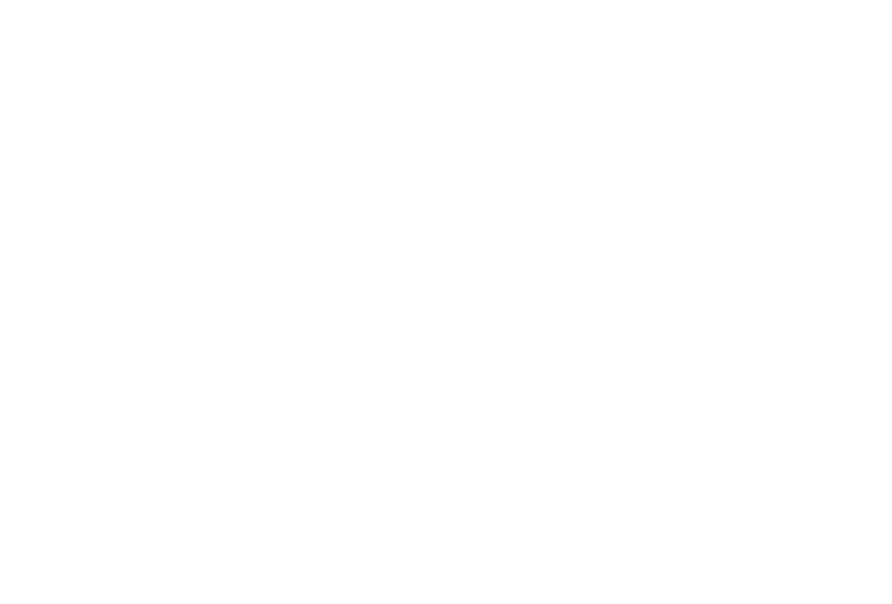
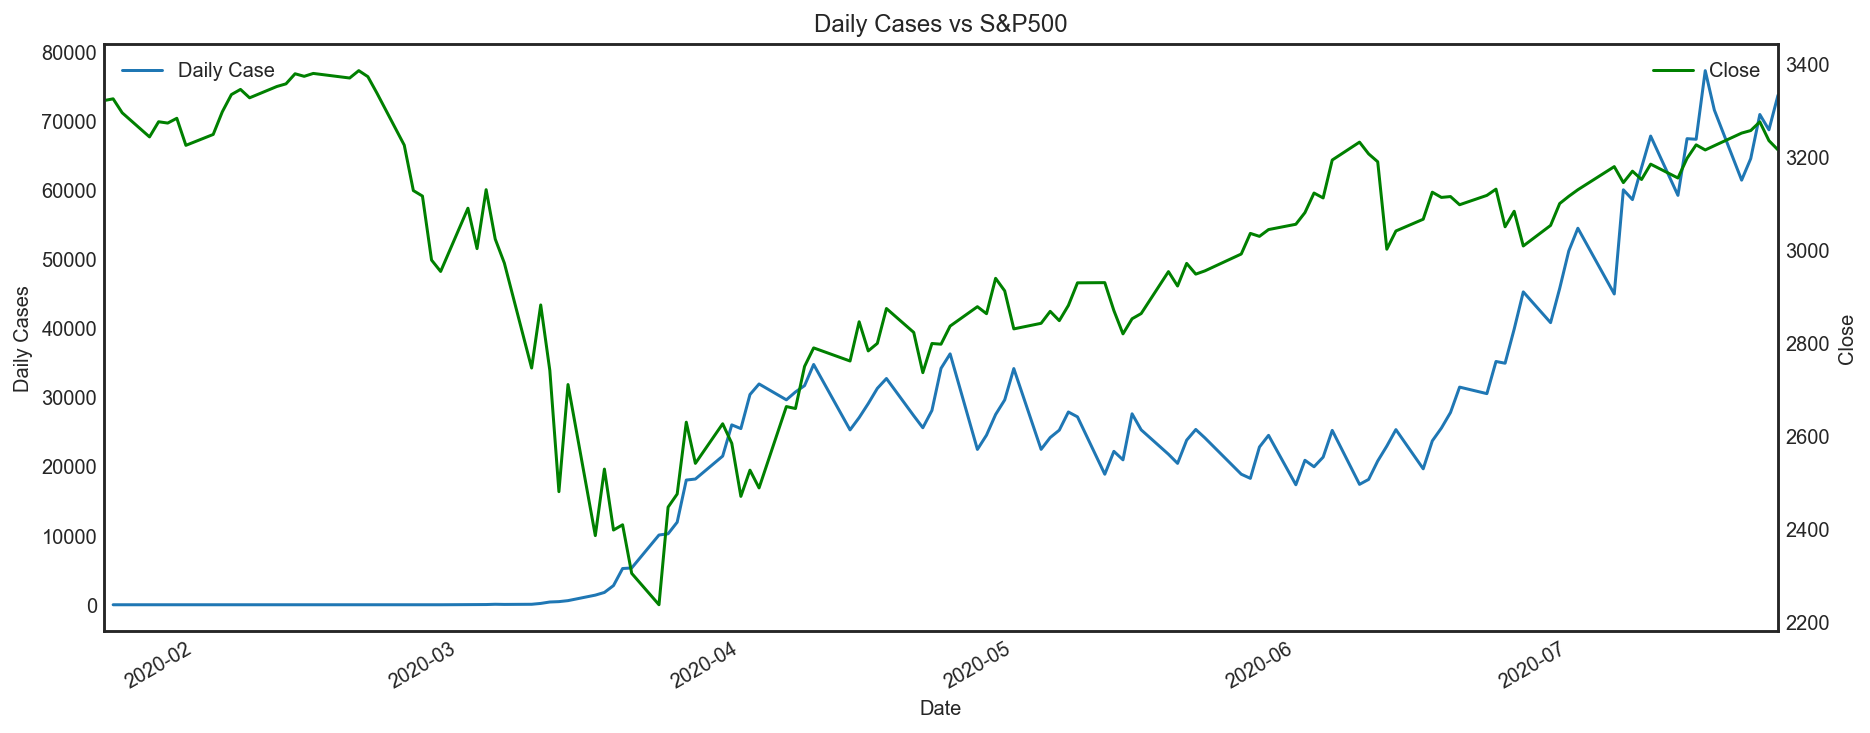
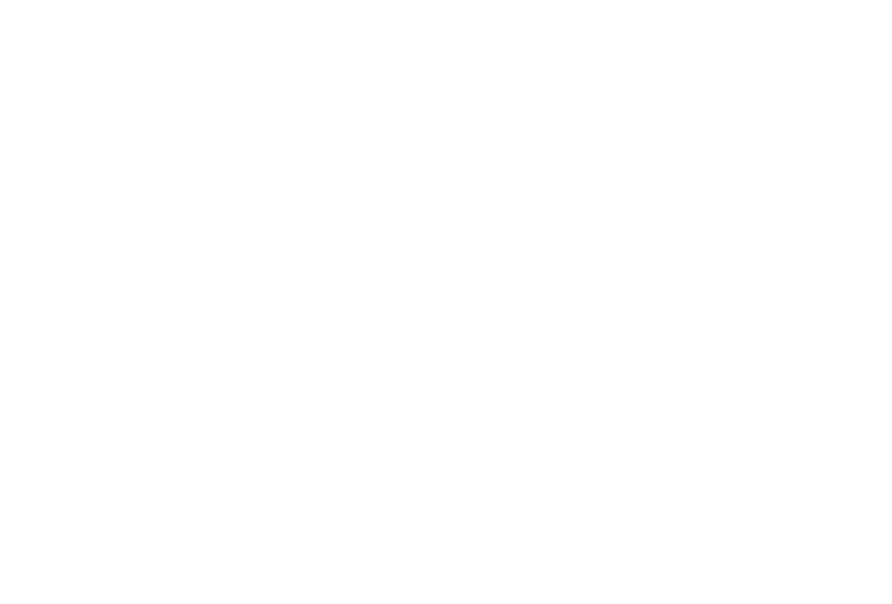

In [75]:
# Create a Title for the Dashboard
title = pn.pane.Markdown("# Impact of COVID-19: Comparative Portfolio Analysis")  
text = pn.pane.Markdown("### This dashboard presents a visual analysis of historical S&P500, effect of COVID19 on the market, Monte Carlo Simulation, and the relationship between daily covid case vs S&P500"
)

# Create a tab layout for the dashboard
welcome = pn.Column(title, text, snp_hist_plot, daily_cases_vs_sp500 )
data_for_analysis = pn.Column(port_indv_plot, finx_plot, sp500_plot)
perfromance_analysis = pn.Column(daily_returns_plot, cum_ret_plot)
risk_analysis=pn.Column(roll_plot, ewm_plot)
sharpe_ratio = pn.Column(sharpe_ratio_plot)
monte_carlo = pn.Column(sim_finx_plot, sim_sp500_plot)
monte_carlo_custom = pn.Column(sim_custom_plot)

# Create the main dashboard
dashboard = pn.Tabs(
    ("Welcome", welcome),
    ("Data for Analysis", data_for_analysis),
    ("Performance Analysis", perfromance_analysis),
    ("Risk Analysis", risk_analysis),
    ("Sharpe Ratio", sharpe_ratio),
    ("Monte Carlo FINX & S&P 500", monte_carlo),
    ("Monte Carlo Custom Portfolio", monte_carlo_custom)
)
dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive04609')
        [3] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, tight=True)
    [1] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(NdOverlay, name='interactive04699')
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive04876')
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive04958')
    [2] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(NdOverlay, name='interactive05041')
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(NdOverlay, name='interactive05170')
    [3] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, tight=True)
        [1] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, tight=True)
    [4] Column
        [0] HoloViews(Bars)
    [5] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive05319')
        [1] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Curve, name='interactive05401')
    [6] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Str(None, name='interactive05484')
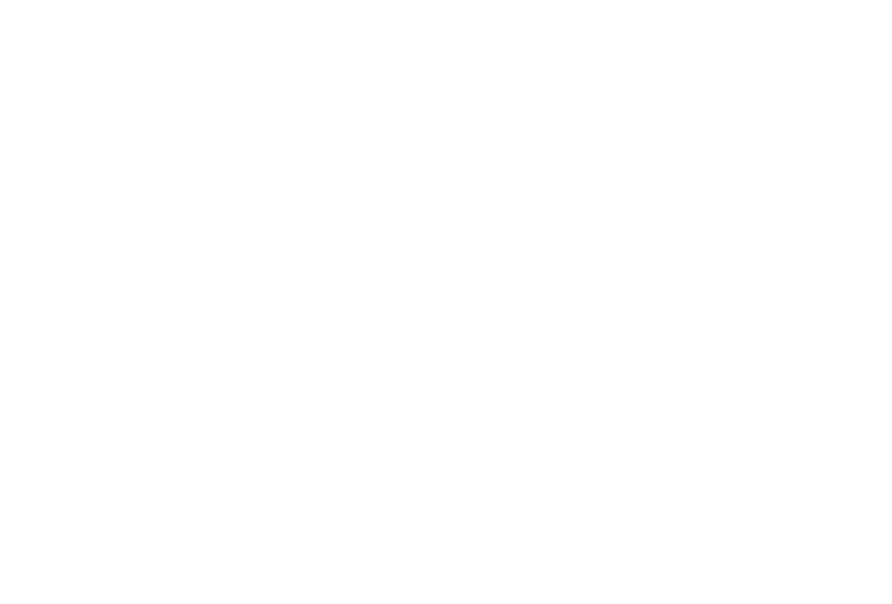
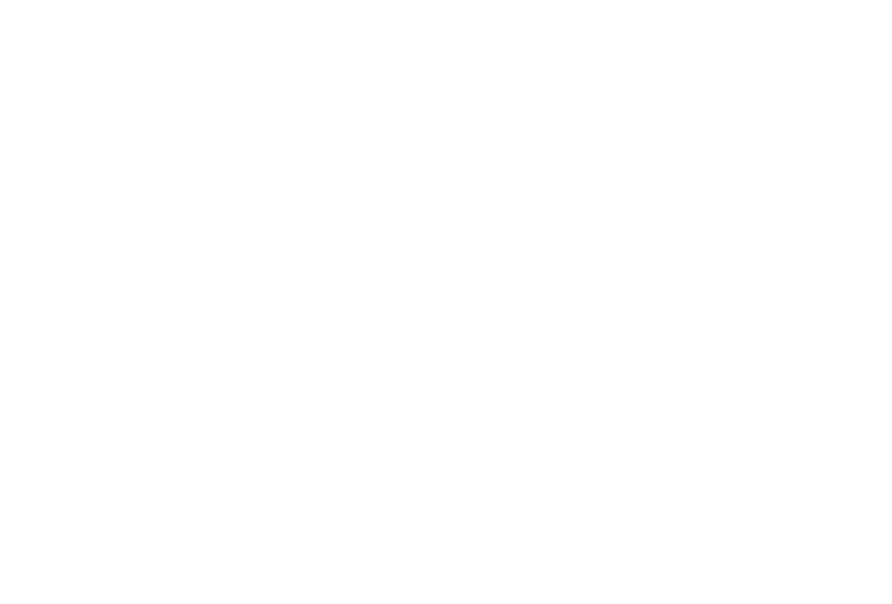
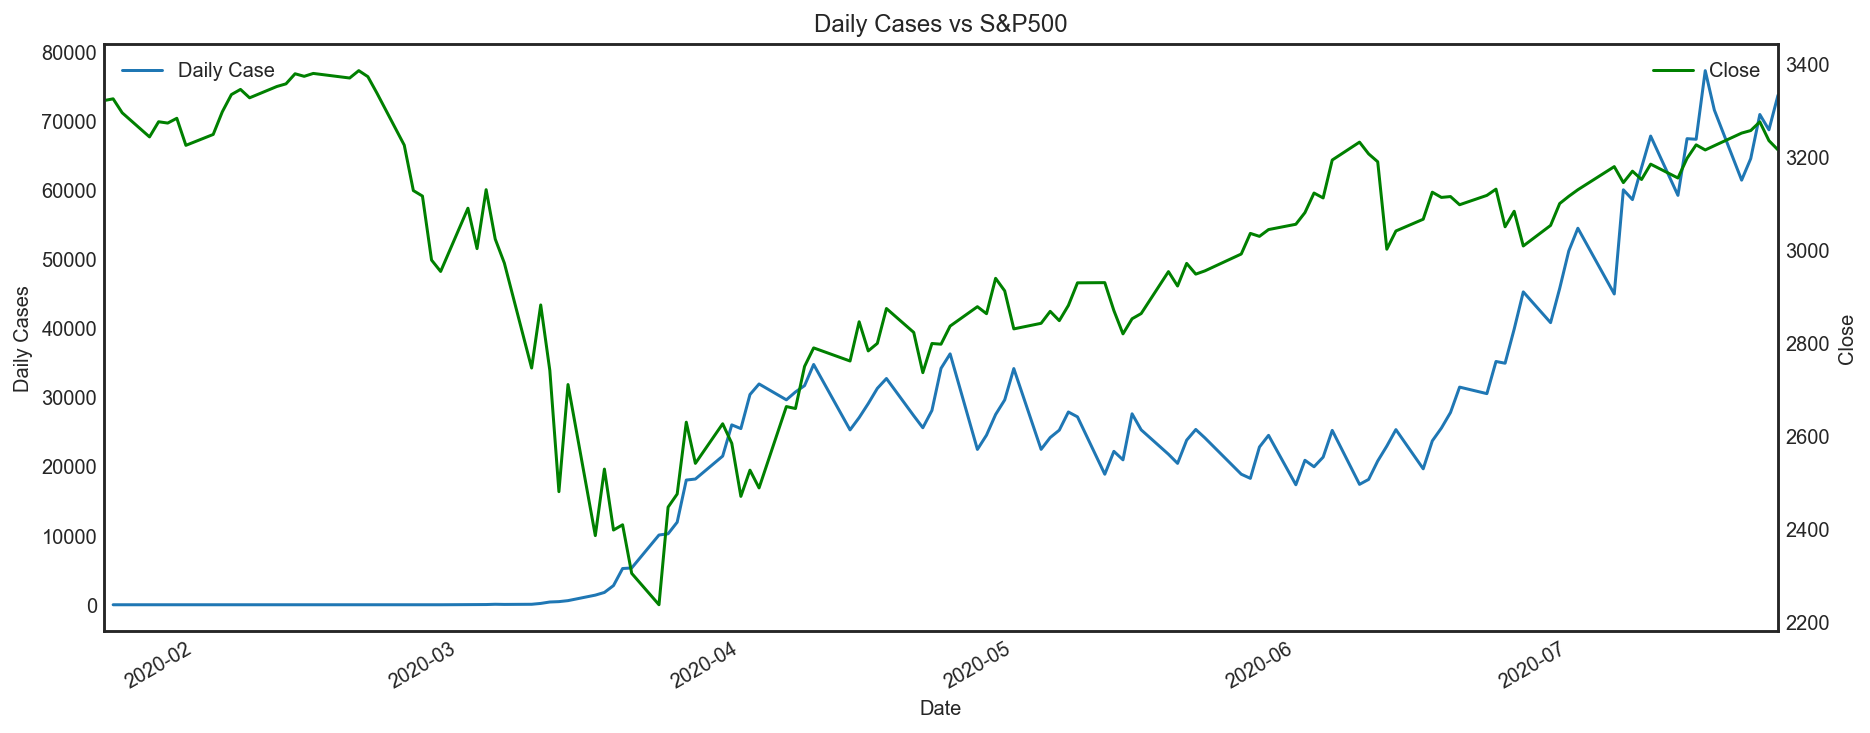

In [76]:
dashboard.servable()